<a href="https://colab.research.google.com/github/neethu2602/DSA_Class_Activities-/blob/main/Visualization_task_NeethuMathew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
stores=pd.read_excel("/content/Sample - Superstore.xlsx")

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
stores.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
stores.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
stores.shape

(9994, 21)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

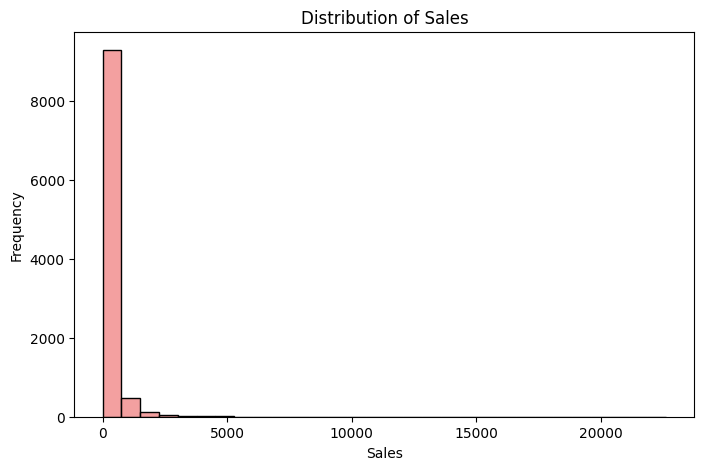

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(stores["Sales"], bins=30, color="lightcoral")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


most orders being small and only a few very large ones

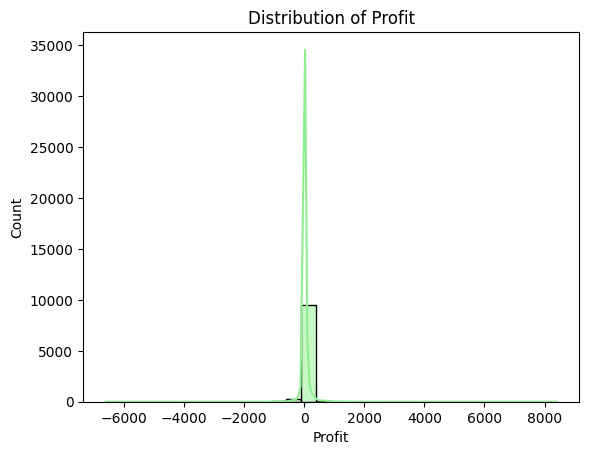

In [10]:
sns.histplot(stores["Profit"], bins=30, kde=True, color="lightgreen")
plt.title("Distribution of Profit")
plt.show()


many orders are profitable, a noticeable number result in losses

/tmp/ipython-input-578247794.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Category", data=stores, palette="Set2")


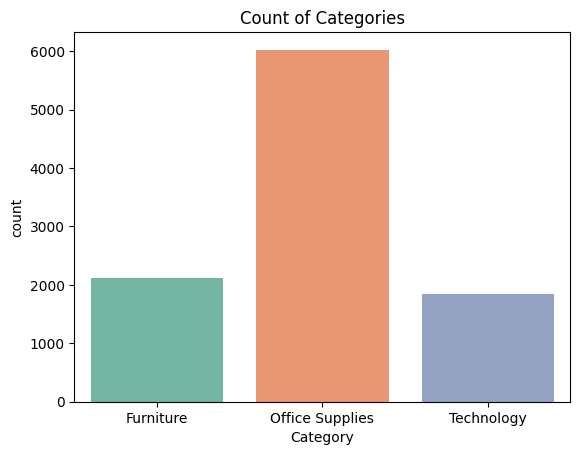

In [ ]:
sns.countplot(x="Category", data=stores, palette="Set2")
plt.title("Count of Categories")
plt.show()


Office Supplies has the highest number of orders, followed by Furniture and then Technology

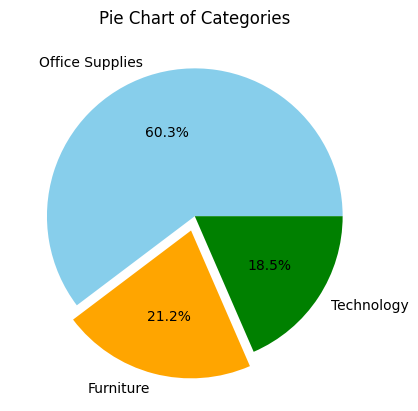

In [ ]:
explode=(0,0.1,0)
stores["Category"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue","orange","green"],explode=explode)
plt.title("Pie Chart of Categories")
plt.ylabel("")
plt.show()


Office Supplies dominate the orders, Furniture comes next, and Technology is the smallest share

/tmp/ipython-input-1856093697.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Discount", data=stores, palette="Set2")


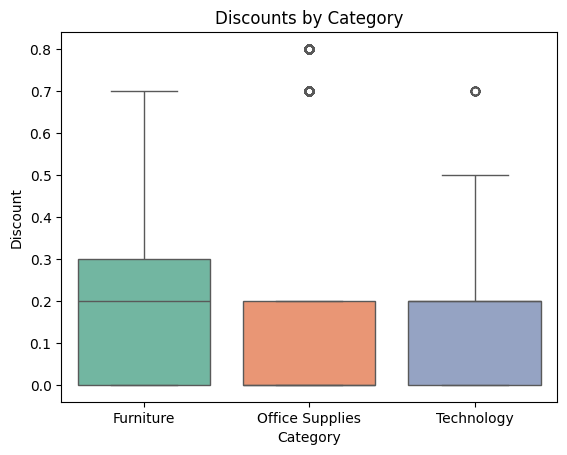

In [15]:
sns.boxplot(x="Category", y="Discount", data=stores, palette="Set2")
plt.title("Discounts by Category")
plt.show()


all categories have similar median discounts, but Furniture and Technology have more  discount outliers, while Office Supplies mostly stays within lower discount ranges

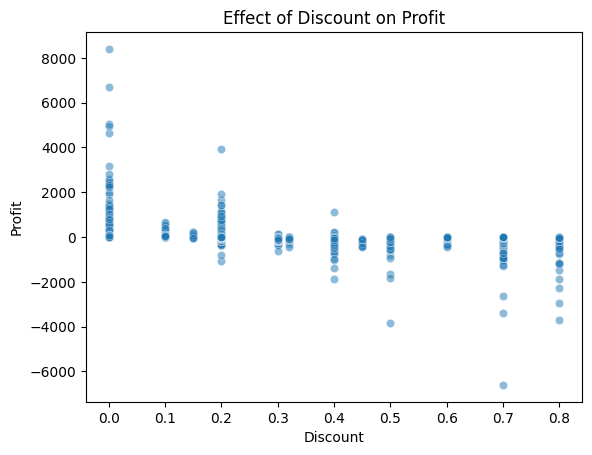

In [16]:
sns.scatterplot(x="Discount", y="Profit", data=stores, alpha=0.5)
plt.title("Effect of Discount on Profit")
plt.show()


higher discounts often lead to negative profits, while lower discounts yield positive profits

/tmp/ipython-input-2656258727.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Region", y="Discount", data=stores, ci=None, palette="muted")
/tmp/ipython-input-2656258727.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Discount", data=stores, ci=None, palette="muted")


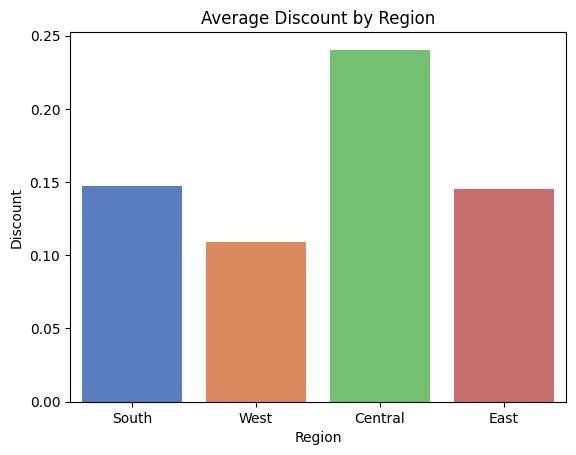

In [17]:
sns.barplot(x="Region", y="Discount", data=stores, ci=None, palette="muted")
plt.title("Average Discount by Region")
plt.show()


average discounts vary slightly across regions,no single region receiving consistently higher or lower discounts

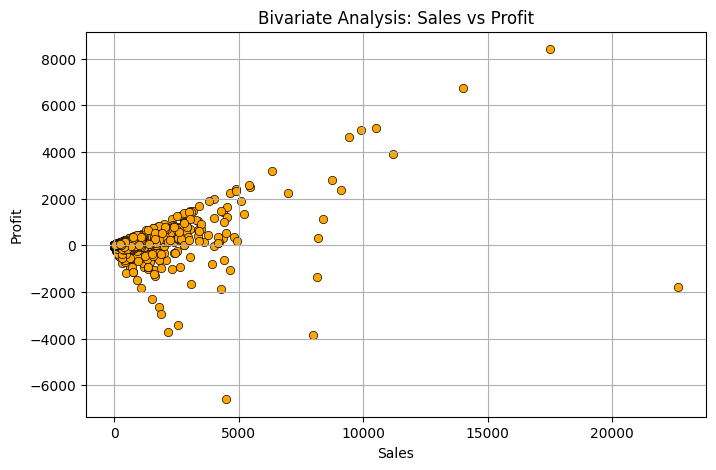

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales", y="Profit", data=stores, color="orange", edgecolor="black")
plt.title("Bivariate Analysis: Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


most orders cluster at low Sales with modest Profits, while high Sales sometimes lead to large losses or gains

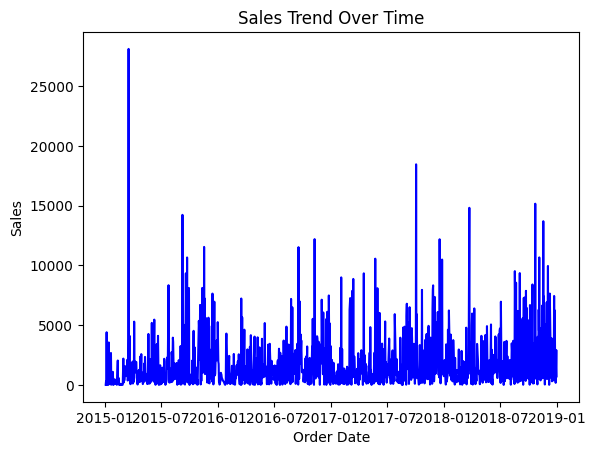

In [ ]:
stores["Order Date"] = pd.to_datetime(stores["Order Date"])
sales_by_date = stores.groupby("Order Date")["Sales"].sum().reset_index()

sns.lineplot(x="Order Date", y="Sales", data=sales_by_date, color="blue")
plt.title("Sales Trend Over Time")
plt.show()


Sales varies over time with clear seasonal peaks and dips

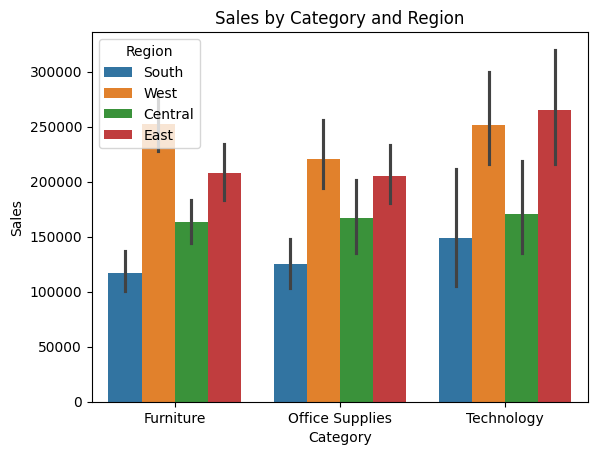

In [ ]:
sns.barplot(x="Category", y="Sales", hue="Region", data=stores, estimator=sum)
plt.title("Sales by Category and Region")
plt.show()


Office Supplies and Furniture sales across all regions, with Technology contributing strongly in some regions

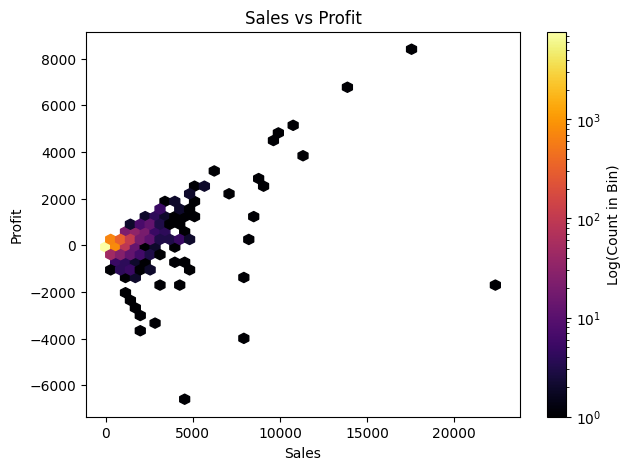

In [22]:
plt.figure(figsize=(7,5))
plt.hexbin(stores["Sales"], stores["Profit"], gridsize=40, cmap="inferno", bins="log")
plt.colorbar(label="Log(Count in Bin)")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")
plt.show()


most orders have low Sales with small profits or losses, while very high Sales are rare but can lead to large positive or negative profit

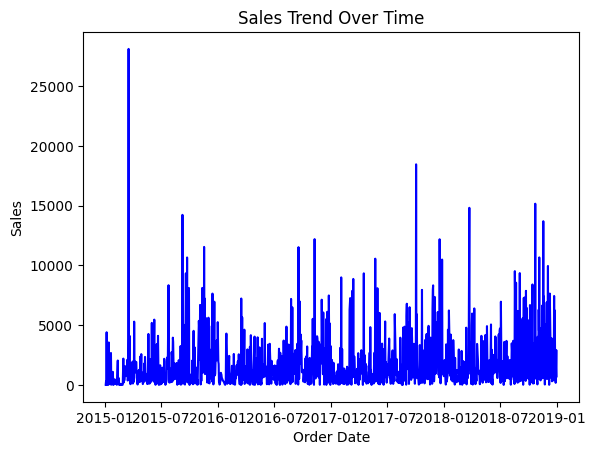

In [13]:
stores["Order Date"] = pd.to_datetime(stores["Order Date"])
sales_by_date = stores.groupby("Order Date")["Sales"].sum().reset_index()

sns.lineplot(x="Order Date", y="Sales", data=sales_by_date, color="blue")
plt.title("Sales Trend Over Time")
plt.show()


sales peaked during certain periods

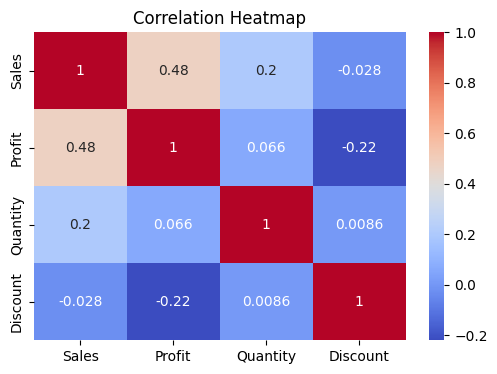

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(stores[["Sales","Profit","Quantity","Discount"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


It highlights that higher discounts often reduce profit, while sales and profit are positively correlated

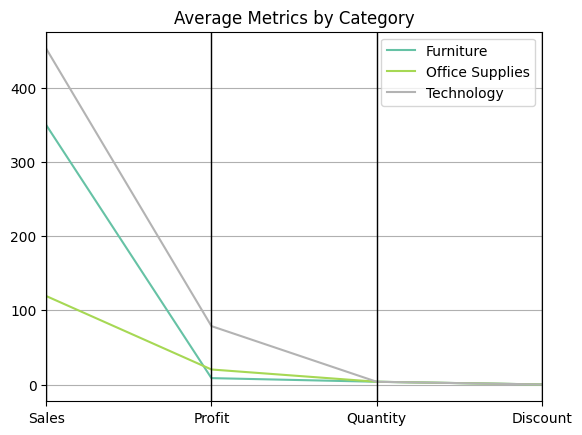

In [23]:
from pandas.plotting import parallel_coordinates

category_means = stores.groupby("Category")[["Sales","Profit","Quantity","Discount"]].mean().reset_index()
parallel_coordinates(category_means, "Category", colormap="Set2")
plt.title("Average Metrics by Category")
plt.show()



Technology has the strongest average profits, Office Supplies achieve steady sales with moderate profits, while Furniture tends to have higher average sales but weaker or sometimes negative profitability due to heavier discounts

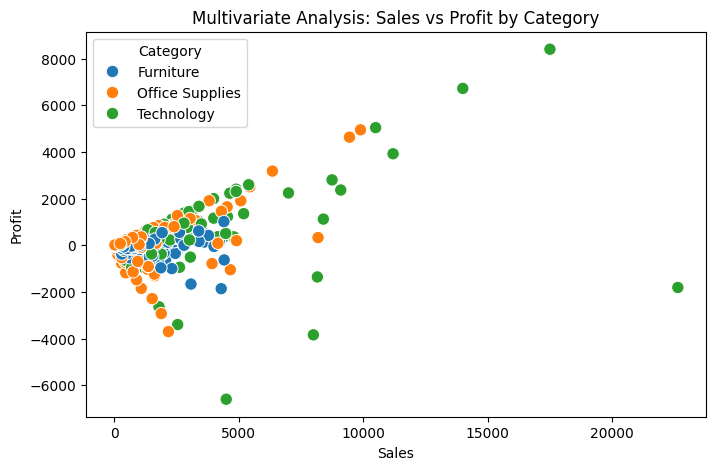

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales", y="Profit", hue="Category", data=stores, s=80)
plt.title("Multivariate Analysis: Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend(title="Category")
plt.show()


higher sales  not always guarantee higher profit, Technology items tend to yield better profits,Furniture sometimes records losses in high sales

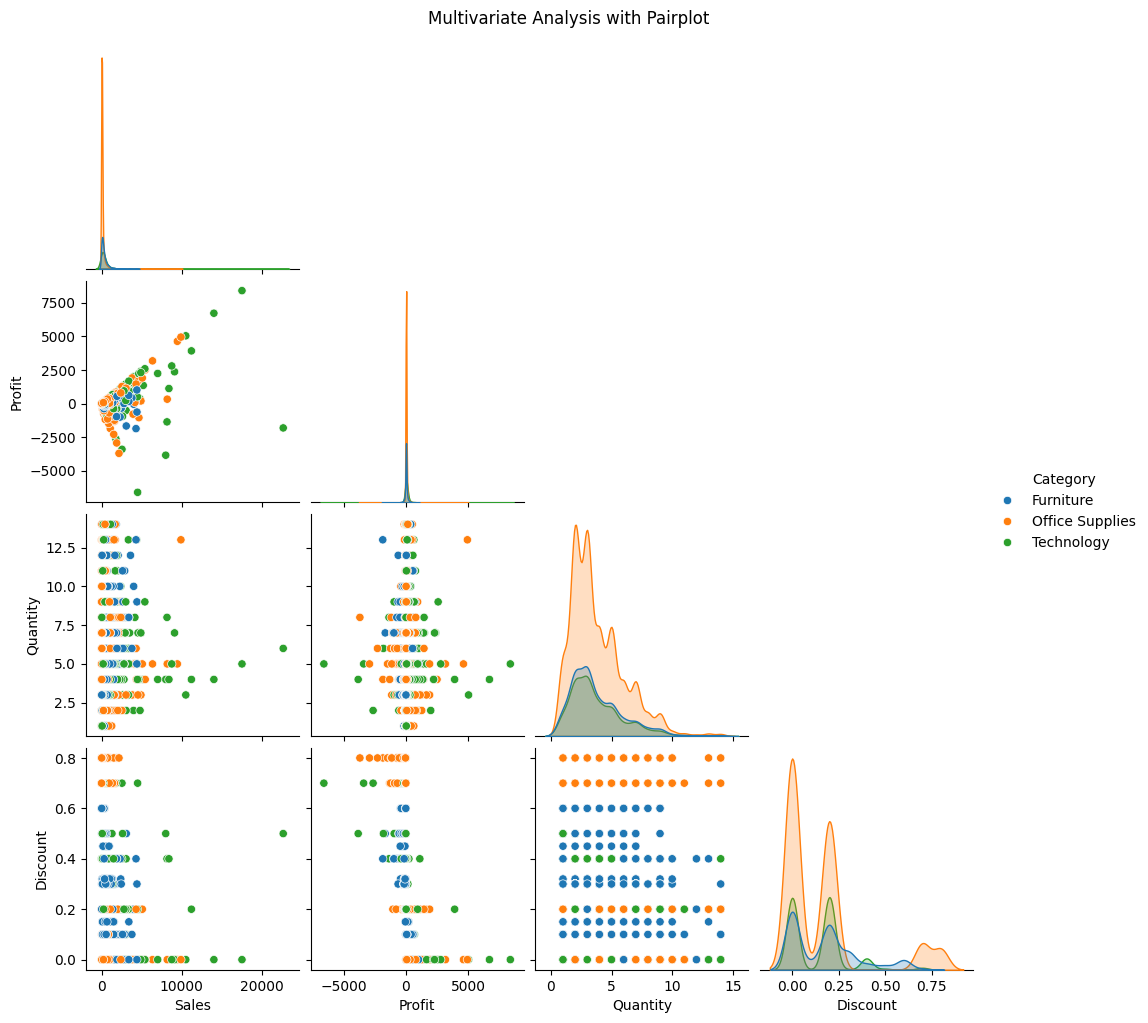

In [ ]:
cols = ["Sales", "Profit", "Quantity", "Discount"]

# Pairplot with hue = Category
sns.pairplot(stores[cols + ["Category"]], hue="Category", diag_kind="kde", corner=True)
plt.suptitle("Multivariate Analysis with Pairplot", y=1.02)
plt.show()

higher discounts negatively impact profit

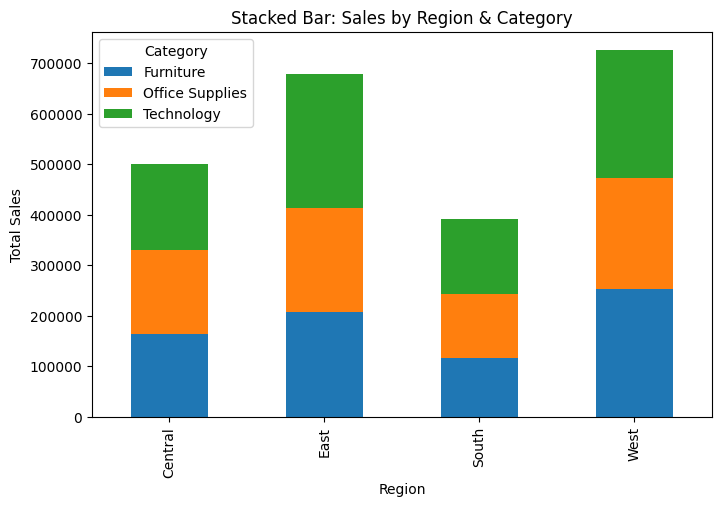

In [ ]:
sales_region_category = stores.groupby(["Region","Category"])["Sales"].sum().unstack()
sales_region_category.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Stacked Bar: Sales by Region & Category")
plt.ylabel("Total Sales")
plt.show()


ffice Supplies and Furniture dominate sales consistently across all regions, while Technology makes especially strong contributions in regions like the West

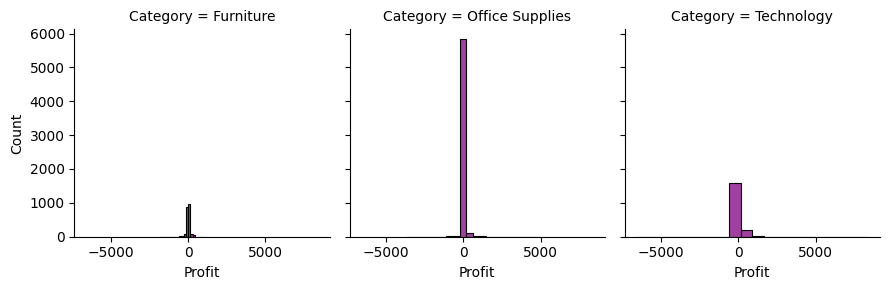

In [ ]:
g = sns.FacetGrid(stores, col="Category")
g.map(sns.histplot, "Profit", bins=20, color="purple")
plt.show()


Furniture has a wider spread with more negative profits, Office Supplies clusters around small profits, and Technology leans toward consistently higher positive profits

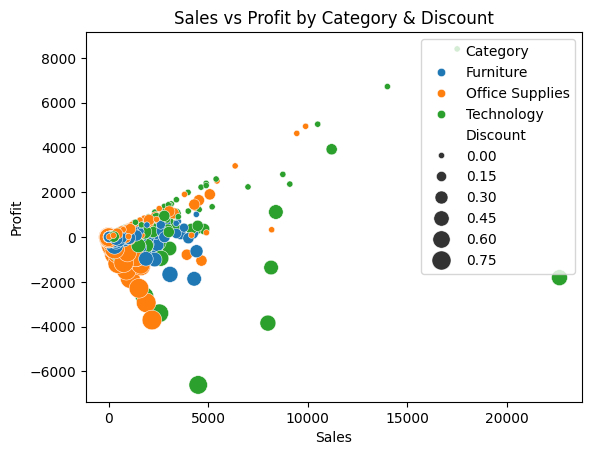

In [ ]:
sns.scatterplot(x="Sales", y="Profit", hue="Category", size="Discount", data=stores, sizes=(20,200))
plt.title("Sales vs Profit by Category & Discount")
plt.show()


higher discounts (larger bubbles) often push profits into negative

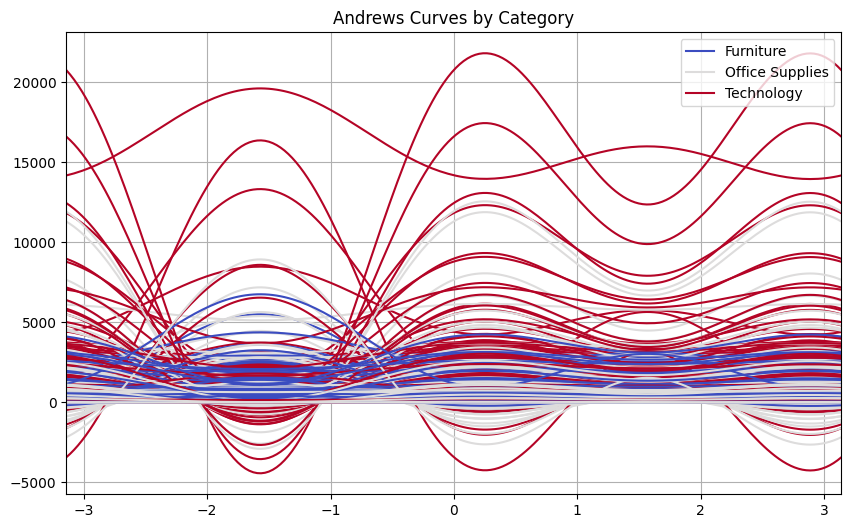

In [ ]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(10,6))
andrews_curves(stores[["Sales","Profit","Quantity","Discount","Category"]], "Category", colormap="coolwarm")
plt.title("Andrews Curves by Category")
plt.show()


Technology follows a stronger profit pattern, while Furniture and Office Supplies share more variability due to discounts and quantities

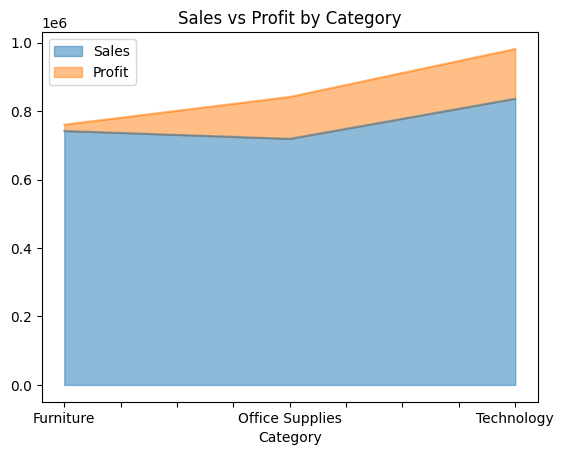

In [ ]:
stores.groupby("Category")[["Sales","Profit"]].sum().plot(kind="area", alpha=0.5, title="Sales vs Profit by Category")
plt.show()


Office Supplies lead insales volume, Technology contributes the strongest profits, whereas Furniture sometimes struggles with lower or negative profit despite high sales

/tmp/ipython-input-3007666241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sub-Category", y="Profit", data=stores, estimator=sum, palette="viridis")


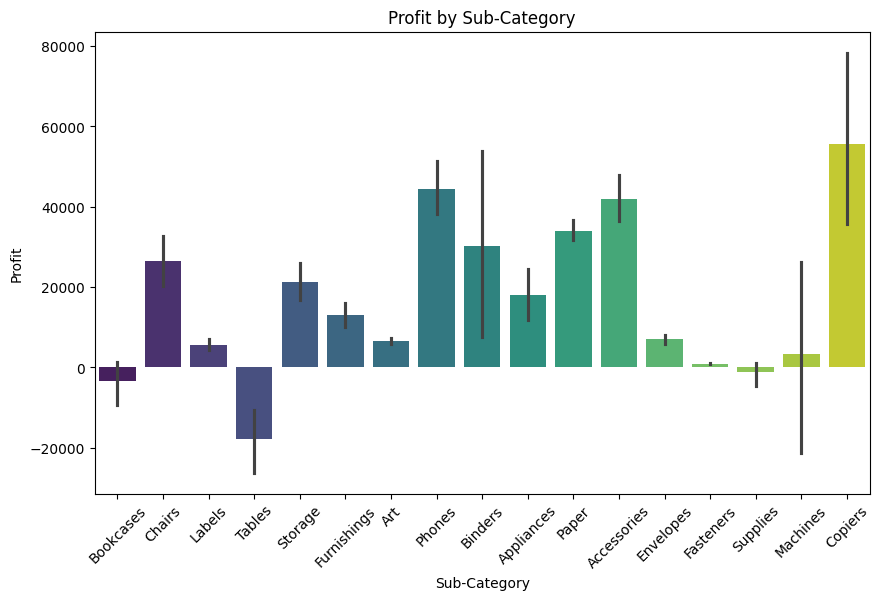

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="Sub-Category", y="Profit", data=stores, estimator=sum, palette="viridis")
plt.xticks(rotation=45)
plt.title("Profit by Sub-Category")
plt.show()


subcategories like Copiers and Phones are strong profit drivers, while Tables and Bookcases often incur significant losses despite generating sales

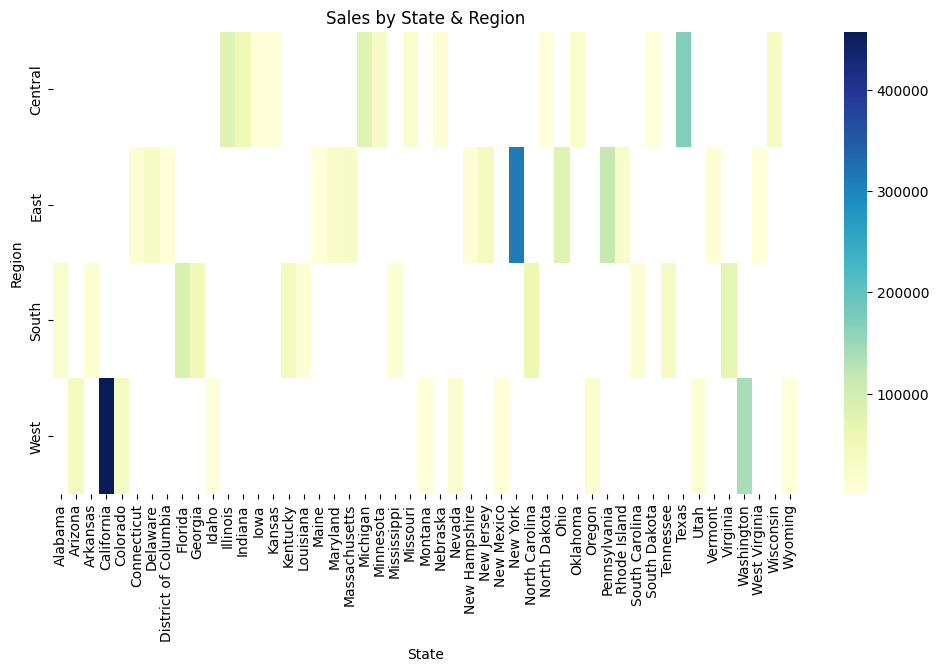

In [25]:
sales_region_state = stores.pivot_table(values="Sales", index="Region", columns="State", aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(sales_region_state, cmap="YlGnBu")
plt.title("Sales by State & Region")
plt.show()


sales are concentrated in a few states (like California and New York), with the West and East regions contributing heavily, while Central and South show more moderate

/tmp/ipython-input-3130353653.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  profit_trend = stores.groupby([pd.Grouper(key="Order Date", freq="M"), "Category"])["Profit"].sum().reset_index()


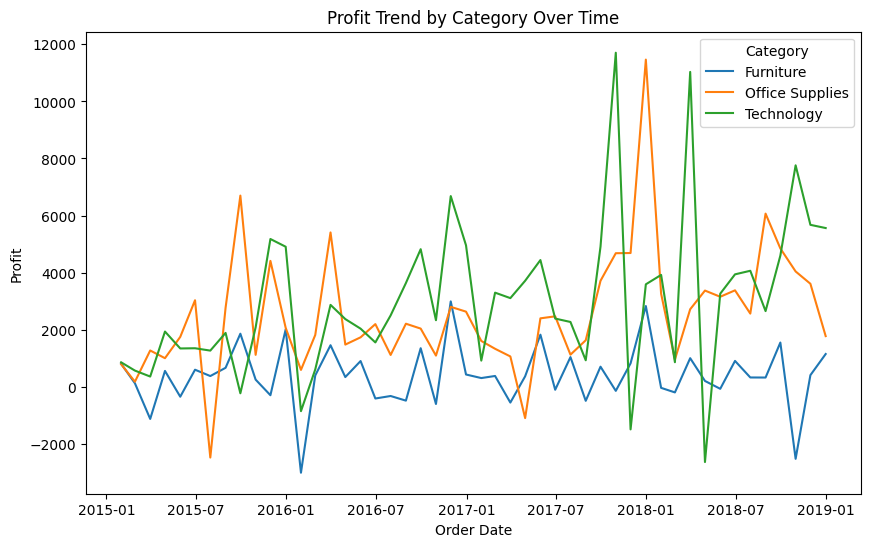

In [26]:
profit_trend = stores.groupby([pd.Grouper(key="Order Date", freq="M"), "Category"])["Profit"].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="Order Date", y="Profit", hue="Category", data=profit_trend)
plt.title("Profit Trend by Category Over Time")
plt.show()


seasonal fluctuations, with Technology maintaining stronger profit growth, Office Supplies steady but modest, and Furniture experiencing volatility with frequent dips into negative profit

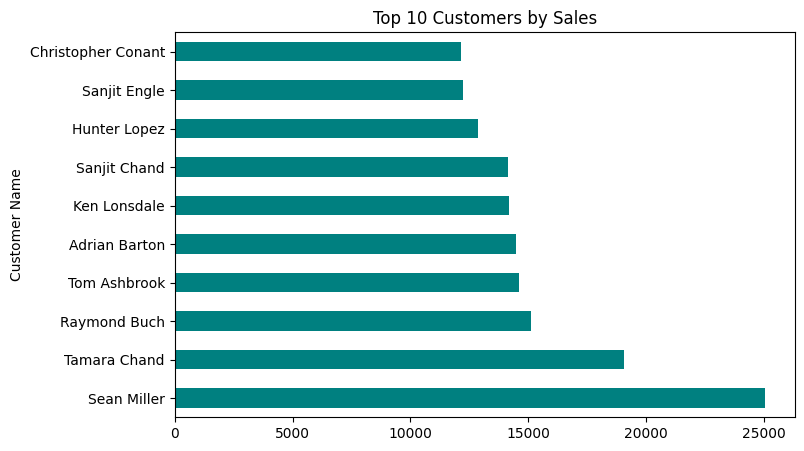

In [27]:
top_customers = stores.groupby("Customer Name")["Sales"].sum().nlargest(10)
top_customers.plot(kind="barh", figsize=(8,5), color="teal", title="Top 10 Customers by Sales")
plt.show()


shows that a small set of customers contribute disproportionately to total sales

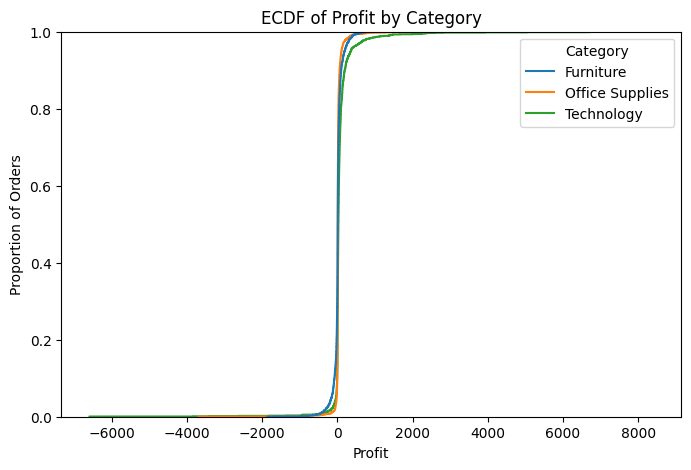

In [30]:
plt.figure(figsize=(8,5))
sns.ecdfplot(x="Profit", data=stores, hue="Category")
plt.title("ECDF of Profit by Category")
plt.xlabel("Profit")
plt.ylabel("Proportion of Orders")
plt.show()


Technology reaches higher profit values more quickly , Office Supplies cluster around smaller profits, and Furniture shows a significant share of negative profit orders, indicating higher risk in that category.

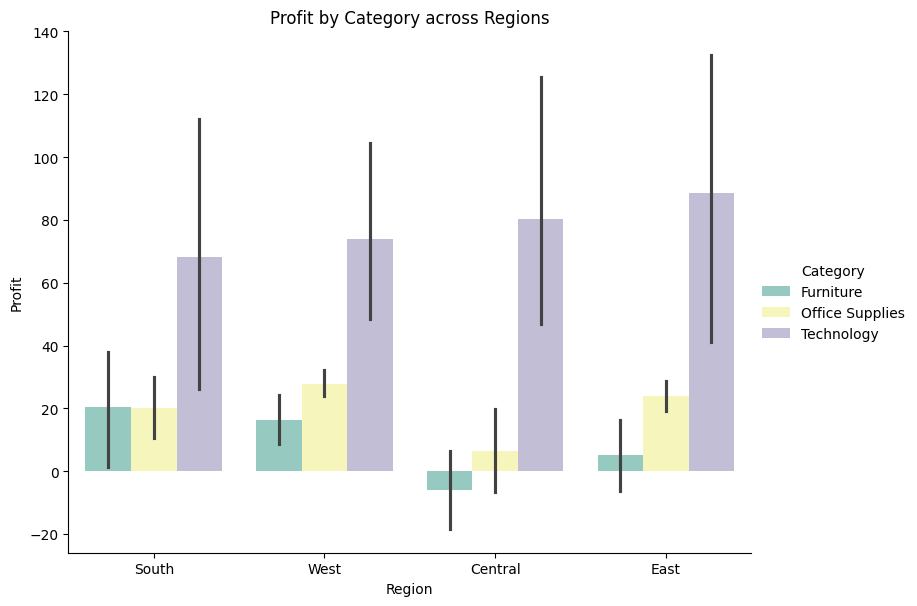

In [32]:
sns.catplot(
    x="Region", y="Profit", hue="Category",
    data=stores, kind="bar", height=6, aspect=1.3, palette="Set3"
)
plt.title("Profit by Category across Regions")
plt.show()


Technology is the strongest profit contributor in all regions, while Furniture lags, especially in the Central region

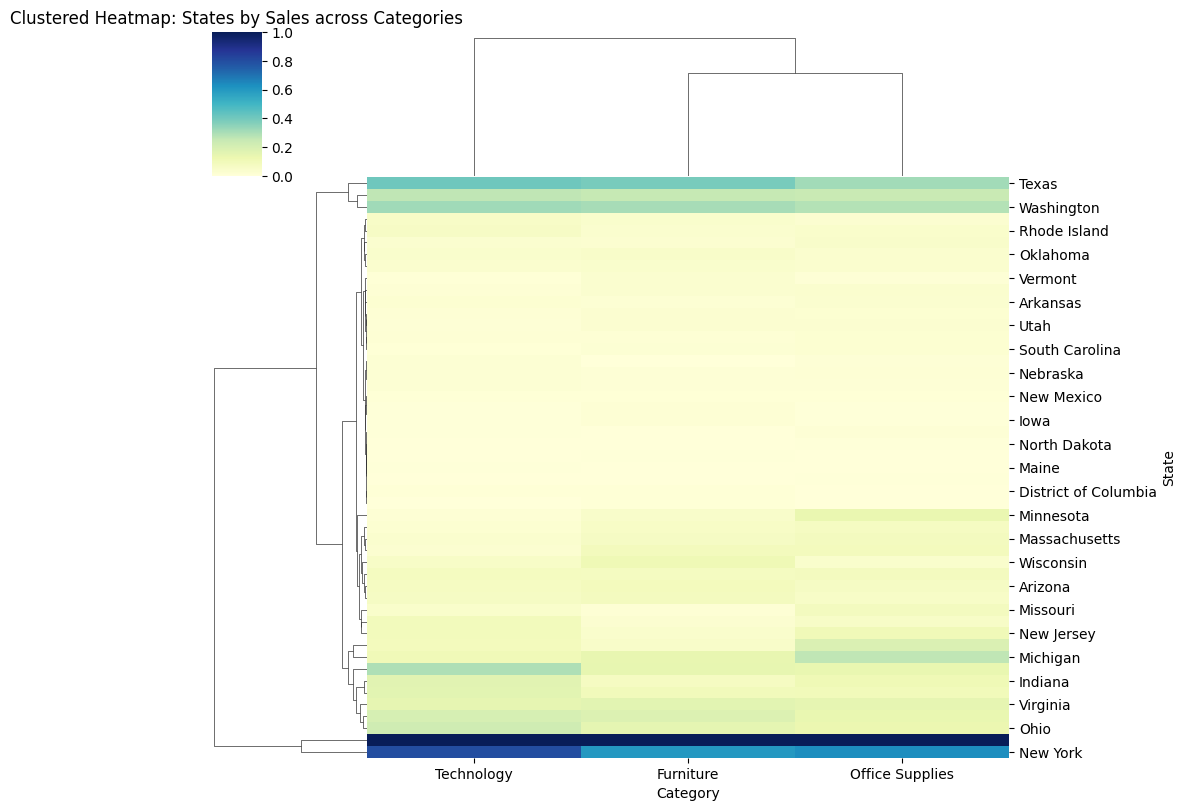

In [33]:
cluster_data = stores.pivot_table(values="Sales", index="State", columns="Category", aggfunc="sum").fillna(0)
sns.clustermap(cluster_data, cmap="YlGnBu", figsize=(10,8), standard_scale=1)
plt.title("Clustered Heatmap: States by Sales across Categories")
plt.show()


spot groups of states with similar buying patterns

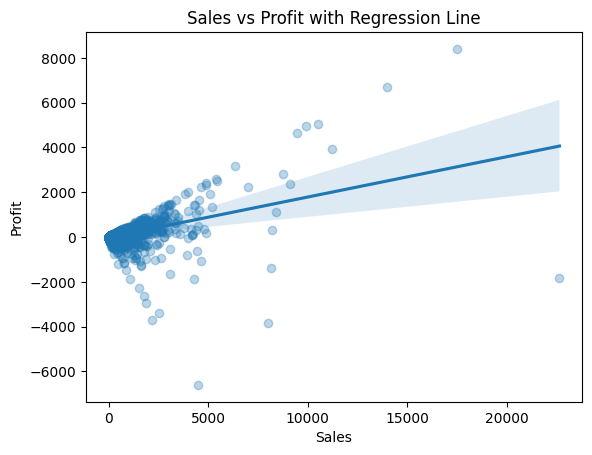

In [34]:
sns.regplot(x="Sales", y="Profit", data=stores, scatter_kws={'alpha':0.3})
plt.title("Sales vs Profit with Regression Line")
plt.show()


higher sales not always guarantee higher profit — outliers with heavy discounts drag profit down

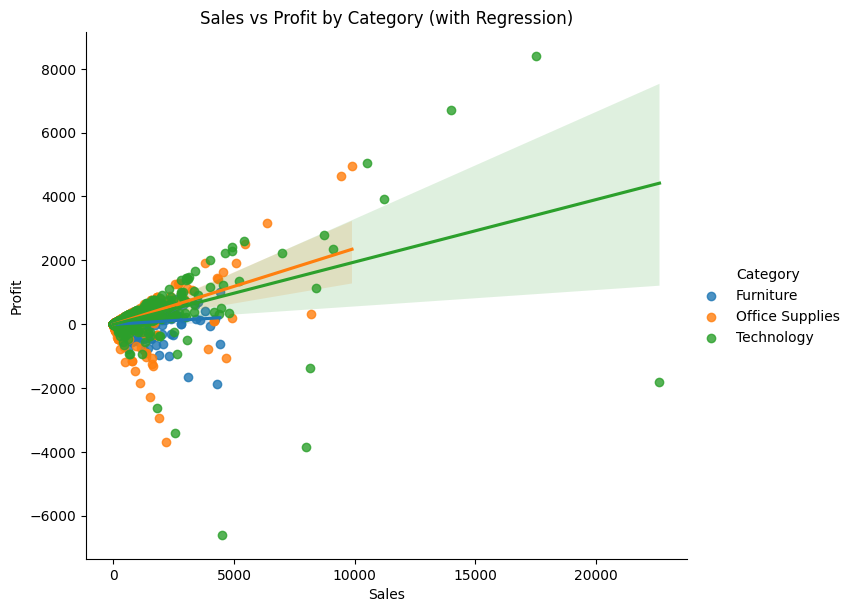

In [35]:
sns.lmplot(x="Sales", y="Profit", hue="Category", data=stores, height=6, aspect=1.2)
plt.title("Sales vs Profit by Category (with Regression)")
plt.show()


Technology tends to have a more positive sales/profit relationship than Furniture

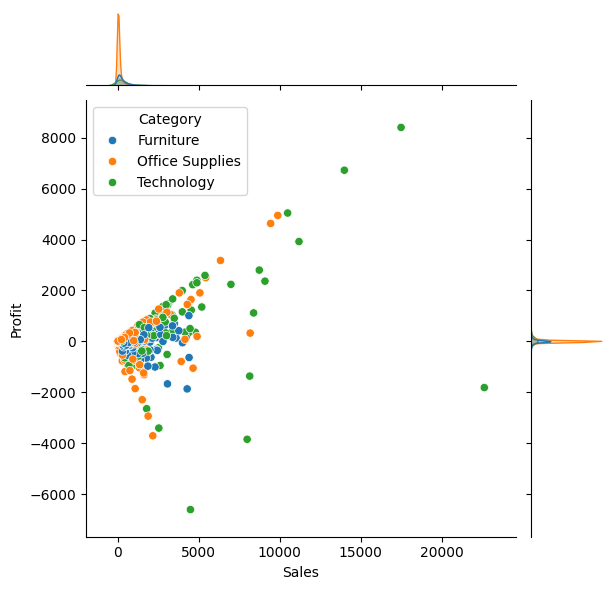

In [36]:
sns.jointplot(x="Sales", y="Profit", data=stores, kind="scatter", hue="Category")
plt.show()


most orders cluster at low sales and low-to-moderate profits, with a few large-sale outliers